In [2]:
# %% [markdown]
# # Import Libraries
# We import the necessary libraries for data handling, modeling, clustering, and evaluation.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

In [ ]:
# %% [markdown]
# # Load the Facebook Video Dataset

df = pd.read_csv('../data/video_timeseries_data.csv')
df.head()

,video_id_anon,channel_id_anon,video_length,views_final,impressions_final,like_final,comment_final,views_1h,impressions_1h,likes_1h,...,likes_144h,comments_144h,views_168h,impressions_168h,likes_168h,comments_168h,views_672h,impressions_672h,likes_672h,comments_672h
0,58006937d7,442388,785,60904.0,96520.0,1094.0,51.0,9.280594e-69,1.470778e-68,1.667045e-70,...,2.018621e-39,9.410390e-41,1.851095e-32,2.933595e-32,3.325065e-34,1.550076e-35,60904.0,96520.0,1094.0,51.0
1,91423a16a2,393056,412,130986.0,286634.0,760.0,116.0,1.995974e-68,4.367749e-68,1.158093e-70,...,1.402333e-39,2.140403e-40,3.981142e-32,8.711852e-32,2.309917e-34,3.525663e-35,130986.0,286634.0,760.0,116.0
2,ac4f416391,333236,186,886216.0,1160128.0,29008.0,184.0,1.350422e-67,1.767811e-67,4.420259e-69,...,5.352482e-38,3.395121e-40,2.693533e-31,3.526052e-31,8.816588e-33,5.592431e-35,886216.0,1160128.0,29008.0,184.0
3,061287596b,599601,338,534100.0,1006887.0,7151.0,165.0,8.138653e-68,1.534301e-67,1.089674e-69,...,1.319484e-38,3.044538e-40,1.623325e-31,3.060297e-31,2.173450e-33,5.014951e-35,534100.0,1006887.0,7151.0,165.0
4,4250d891df,616089,400,203323.0,382255.0,2174.0,351.0,3.098250e-68,5.824828e-68,3.312756e-70,...,4.011410e-39,6.476563e-40,6.179727e-32,1.161812e-31,6.607578e-34,1.066817e-34,203323.0,382255.0,2174.0,351.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
channel_id_anon,13754.0,497909.500872,2.925827e+05,8.700000e+02,2.479570e+05,5.416110e+05,7.393200e+05,9.960770e+05
video_length,13754.0,384.823251,3.621304e+02,0.000000e+00,2.070000e+02,3.130000e+02,4.777500e+02,7.364000e+03
views_final,13754.0,278716.328777,1.088539e+06,2.790000e+02,1.497850e+04,4.572900e+04,1.652182e+05,5.022298e+07
impressions_final,13754.0,474496.500073,1.742728e+06,5.002000e+03,3.377300e+04,9.497200e+04,3.074818e+05,8.048320e+07
like_final,13754.0,5303.670714,1.998342e+04,5.000000e+00,2.952500e+02,9.460000e+02,3.161500e+03,9.788650e+05
comment_final,13754.0,286.806456,1.360757e+03,1.000000e+00,1.400000e+01,4.400000e+01,1.470000e+02,7.619400e+04
views_1h,13754.0,7.160662,7.014146e+01,4.875600e-131,2.676224e-69,8.250881e-69,3.493030e-68,3.273040e+03
impressions_1h,13754.0,13.944213,1.124092e+02,6.896750e-70,5.983228e-69,1.699601e-68,6.326911e-68,3.230106e+03
likes_1h,13754.0,0.429923,8.424702e+00,2.517173e-81,5.428562e-71,1.723426e-70,6.619798e-70,5.522239e+02
comments_1h,13754.0,0.147470,5.244416e+00,2.673688e-162,2.399996e-72,7.923796e-72,2.910471e-71,5.584598e+02


In [7]:
# %% [markdown]
# # Define Early-Accessible Features and Target
# We use the early metrics from the 1-hour mark and the video length as features.
# Our target is `views_final` (the final cumulative views).

# early_feature_cols = ['impressions_1h', 'views_1h', 'likes_1h', 'comments_1h', 'video_length']
early_feature_cols = [
    'video_length',
    'views_1h', 'impressions_1h', 'likes_1h', 'comments_1h',
    'views_3h', 'impressions_3h', 'likes_3h', 'comments_3h',
    'views_6h', 'impressions_6h', 'likes_6h', 'comments_6h',
    'views_12h', 'impressions_12h', 'likes_12h', 'comments_12h',
    'views_24h', 'impressions_24h', 'likes_24h', 'comments_24h'
]
early_features = df[early_feature_cols]
target = df['views_final']

early_features.head()

,video_length,views_1h,impressions_1h,likes_1h,comments_1h,views_3h,impressions_3h,likes_3h,comments_3h,views_6h,...,likes_6h,comments_6h,views_12h,impressions_12h,likes_12h,comments_12h,views_24h,impressions_24h,likes_24h,comments_24h
0,785,9.280594e-69,1.470778e-68,1.667045e-70,7.771416e-72,2.525251e-68,4.001990e-68,4.536031e-70,2.114603e-71,1.133438e-67,...,2.035960e-69,9.491221e-71,2.283411e-66,3.618725e-66,4.101621e-68,1.912090e-69,9.267374e-64,1.468683e-63,1.664670e-65,7.760346e-67
1,412,1.995974e-68,4.367749e-68,1.158093e-70,1.767616e-71,5.431048e-68,1.188465e-67,3.151174e-70,4.809686e-71,2.437680e-67,...,1.414378e-69,2.158787e-70,4.910923e-66,1.074647e-65,2.849389e-68,4.349068e-69,1.993131e-63,4.361527e-63,1.156444e-65,1.765098e-66
2,186,1.350422e-67,1.767811e-67,4.420259e-69,2.803805e-71,3.674501e-67,4.810217e-67,1.202753e-68,7.629157e-71,1.649269e-66,...,5.398457e-68,3.424284e-70,3.322598e-65,4.349548e-65,1.087567e-66,6.898522e-69,1.348499e-62,1.765293e-62,4.413963e-64,2.799811e-66
3,338,8.138653e-68,1.534301e-67,1.089674e-69,2.514281e-71,2.214529e-67,4.174836e-67,2.965006e-69,6.841364e-71,9.939727e-67,...,1.330818e-68,3.070689e-70,2.002446e-65,3.775017e-65,2.681051e-67,6.186175e-69,8.127060e-63,1.532116e-62,1.088122e-64,2.510700e-66
4,400,3.098250e-68,5.824828e-68,3.312756e-70,5.348562e-71,8.430343e-68,1.584937e-67,9.014015e-70,1.455345e-70,3.783889e-67,...,4.045865e-69,6.532193e-70,7.622979e-66,1.433149e-65,8.150754e-68,1.315968e-68,3.093837e-63,5.816531e-63,3.308037e-65,5.340944e-66


In [ ]:
# %% [markdown]
# # Baseline: Predict Final Views Using a Decision Tree
# Split the data into training and test sets, and train a DecisionTreeRegressor
# to predict `views_final` from early features.

X_train, X_test, y_train, y_test = train_test_split(early_features, target, test_size=0.2, random_state=42)

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Predict on the test set and evaluate performance.
y_pred_dt = dt_reg.predict(X_test)
print("Decision Tree Prediction R²:", r2_score(y_test, y_pred_dt))
print("Decision Tree Prediction MAPE:", mean_absolute_percentage_error(y_test, y_pred_dt))

Decision Tree Prediction R²: -0.06986532840851711
Decision Tree Prediction MAPE: 14.89833860105417


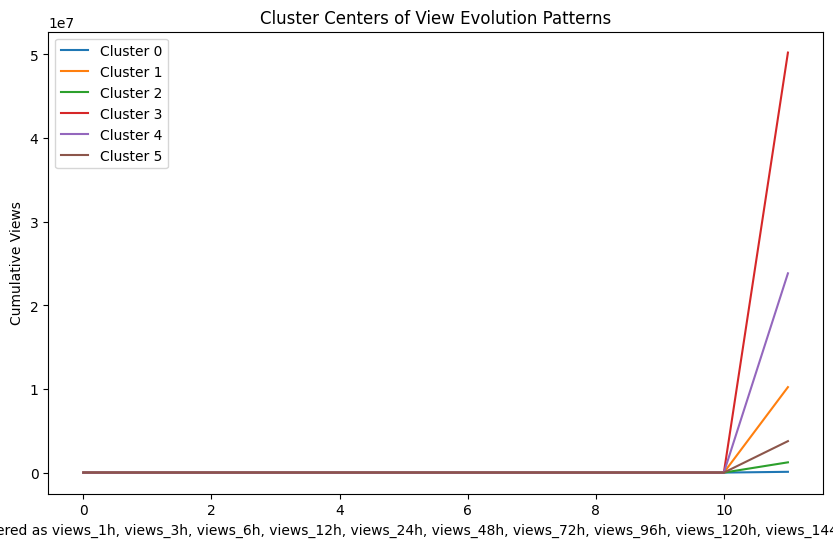

In [ ]:
# %% [markdown]
# # Clustering Videos by Their View Evolution Patterns
# We extract the time series of cumulative views measured at different hours.
# The columns are assumed to be in time order: 1h, 3h, 6h, 12h, 24h, 48h, 72h, 96h, 120h, 144h, 168h, 672h.

view_time_cols = ['views_1h', 'views_3h', 'views_6h', 'views_12h', 'views_24h',
                  'views_48h', 'views_72h', 'views_96h', 'views_120h', 'views_144h',
                  'views_168h', 'views_672h']

# Extract the view evolution matrix.
view_series = df[view_time_cols].values

# Cluster the videos into 6 clusters to capture different evolution patterns.
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(view_series)
df['cluster'] = cluster_labels

# Plot the cluster centers to visualize typical evolution patterns.
plt.figure(figsize=(10,6))
for i in range(n_clusters):
    plt.plot(kmeans.cluster_centers_[i], label=f'Cluster {i}')
plt.xlabel("Time Period Index (ordered as " + ", ".join(view_time_cols) + ")")
plt.ylabel("Cumulative Views")
plt.title("Cluster Centers of View Evolution Patterns")
plt.legend()
plt.show()

In [10]:
# %% [markdown]
# # Compute Early View Increments for Specialized Modeling
# We create early view increment features using the first three time points.
# Here, we define:
# - inc_1h = views at 1h (assuming 0 at t0)
# - inc_3h = views_3h - views_1h
# - inc_6h = views_6h - views_3h

df['inc_1h'] = df['views_1h']  # first increment (from 0 to 1h)
df['inc_3h'] = df['views_3h'] - df['views_1h']
df['inc_6h'] = df['views_6h'] - df['views_3h']

inc_feature_cols = ['inc_1h', 'inc_3h', 'inc_6h']
df[inc_feature_cols].head()

,inc_1h,inc_3h,inc_6h
0,9.280594e-69,1.597192e-68,8.809128e-68
1,1.995974e-68,3.435074e-68,1.894576e-67
2,1.350422e-67,2.324078e-67,1.281819e-66
3,8.138653e-68,1.400663e-67,7.725199e-67
4,3.098250e-68,5.332093e-68,2.940855e-67


In [ ]:
# %% [markdown]
# # Train Specialized Linear Regression Models Per Cluster
# We use the early view increments as features to predict `views_final`.
# A separate linear regression model is trained for each cluster identified above.

specialized_models = {}
specialized_predictions = np.zeros(len(df))

for cluster in sorted(df['cluster'].unique()):
    # Select data for the current cluster.
    cluster_data = df[df['cluster'] == cluster]
    X_cluster = cluster_data[inc_feature_cols]
    y_cluster = cluster_data['views_final']

    # Train a simple linear regression model.
    lr = LinearRegression()
    lr.fit(X_cluster, y_cluster)

    # Save the model in the dictionary.
    specialized_models[cluster] = lr

    # Predict final views for this cluster.
    specialized_predictions[cluster_data.index] = lr.predict(X_cluster)

print("Specialized Models Overall MAPE:", mean_absolute_percentage_error(df['views_final'], specialized_predictions))
print("Specialized Models Overall R²:", r2_score(df['views_final'], specialized_predictions))

Specialized Models Overall MAPE: 4.737668080370264
Specialized Models Overall R²: 0.9874104690811671
